# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split.

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [43]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np

from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [45]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""

    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [46]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    text = data_line[2]
    label = data_line[1]
    return (label , text)


In [47]:

# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    token_word = text.split(' ')

    return token_word

# Question 2: Basic Feature Extraction (20 marks)

In [48]:
from scipy.sparse import csr_matrix

global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    tmp_dic = {}
    for i in tokens:
      tmp_dic[i] = tokens.count(i)
    global_feature_dict.update(tmp_dic)

    return tmp_dic


In [49]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [50]:
#solution
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
actual_sentiment = []
pred = []

precision = list()
f1= list()
acc= list()
recall= list()

cnf_mat = list()

glb_yt = list()
glb_yp = list()
def cross_validate(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1
    cx = 0
    for i in range(0,10):
      print('Fold',i+1)
      for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        # FILL IN THE METHOD HERE

        print("Fold start on items %d - %d" % (i, i+fold_size))
        par_f = int(fold_size/10)
        if cx==i:
          tst_samp = dataset[i:i+fold_size]
        else:
          if len(dataset[i:i+fold_size])==0:
             break
          cls = train_classifier(dataset[i:i+fold_size])

      if len(tst_samp)>0:
        #test the trained sample
          samp=list()
          actual_sentiment = list()
          for i in tst_samp:
            samp.append(i[0])
            actual_sentiment.append(i[1])
          print('testing classifier on partition',cx+1)
          pred = predict_labels(samp, cls)

          glb_yt.append(actual_sentiment)
          glb_yp.append(pred)

          precision.append(precision_score(y_true=actual_sentiment, y_pred=pred, pos_label="positive"))
          recall.append(recall_score(actual_sentiment, pred,pos_label='positive'))
          f1.append(f1_score(actual_sentiment, pred,pos_label='positive'))
          acc.append(accuracy_score(actual_sentiment, pred))
          #cnf_mat.append(confusion_matrix(actual_sentiment, pred, normalize='all'))
          cnf_mat.append(confusion_matrix(actual_sentiment, pred))
          cv_results = confusion_matrix(actual_sentiment, pred, normalize='all')

          cx=cx+1

    return None

In [51]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [52]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path)

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
103970


In [53]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold 1
Fold start on items 0 - 2684
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 18788 - 21472
Training Classifier...
Fold start on items 21472 - 24156
Training Classifier...
Fold start on items 24156 - 26840
Training Classifier...
testing classifier on partition 1
Fold 2
Fold start on items 0 - 2684
Training Classifier...
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 18788 

# Question 4: Error Analysis (20 marks)

In [54]:
prec_avg=0
acc_avg=0
rec_avg=0
f1_avg=0
for i in range(0,10):
  prec_avg=prec_avg+precision[i]
  acc_avg=acc_avg+acc[i]
  rec_avg=rec_avg+recall[i]
  f1_avg=f1_avg+f1[i]

prec_avg=prec_avg/10
acc_avg=acc_avg/10
rec_avg=rec_avg/10
f1_avg=f1_avg/10


print('Precision: ',prec_avg)
print('Accuracy: ',acc_avg)
print('Recall: ',rec_avg)
print('F1: ',f1_avg)
#cnf_mat

Precision:  0.8168734491315137
Accuracy:  0.7805514157973175
Recall:  0.8821007502679528
F1:  0.8482349909817055


In [55]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds,labels =labels)
   # cm = cnf_mat
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

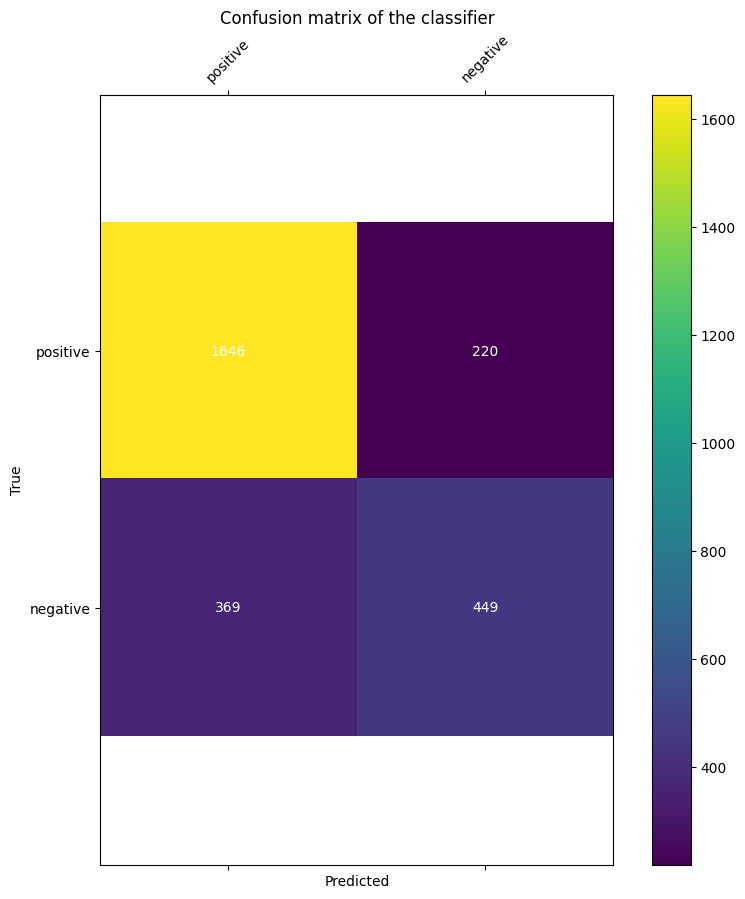

In [56]:
#glb_yp
confusion_matrix_heatmap(glb_yt[0] , glb_yp[0] , labels=['positive', 'negative'])

# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [57]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'Tomorrow': 1, "we'll": 1, 'release': 1, 'our': 2, '58th': 1, 'episode': 1, 'of': 1, '#HSonAir': 1, 'profiling': 1, 'very': 1, 'own': 1, '@AlissaDosSantos': 1, '!': 1, "We'll": 1, 'talk': 1, 'about': 1, 'storytelling': 1, 'and': 1, 'Beyonce!': 1}, 'positive')
Training Classifier...
Done training!
Precision: 0.832458
Recall: 0.834228
F Score:0.832938
